## In this EDA we'll explore the number of cities that have Internet access and the type of connection for each province, as well as what percentaje of households has access to the web.

#### Import `pandas` library in order to read and visualize the csv file.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../DataSets/Listado_de_localidades_con_conectividad_a_internet.csv', sep = ',')

### Check for any null value

In [3]:
df.isnull().sum()

Provincia         0
Partido           0
Localidad         0
ADSL              0
Cablemódem        0
Dial Up           0
Fibra óptica      0
4G                0
3G                0
Telefonía Fija    0
Wireless          0
Satelital         0
dtype: int64

#### Inspect the first five rows of the DataFrame

In [4]:
df.head()

,Provincia,Partido,Localidad,ADSL,Cablemódem,Dial Up,Fibra óptica,4G,3G,Telefonía Fija,Wireless,Satelital
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),SI,--,--,--,SI,SI,SI,--,--
1,BUENOS AIRES,9 de Julio,Carlos María Naón,--,--,--,--,SI,SI,SI,--,--
2,BUENOS AIRES,9 de Julio,Dudignac,--,--,SI,--,SI,SI,SI,SI,--
3,BUENOS AIRES,9 de Julio,La Aurora (Est. La Niña),--,--,--,--,SI,--,--,--,--
4,BUENOS AIRES,9 de Julio,Manuel B. Gonnet (Est. French),SI,--,--,SI,SI,SI,SI,--,--


### Now we check for any duplicate value

In [5]:
df.duplicated().value_counts()

False    4309
True        2
Name: count, dtype: int64

In [6]:
df.drop_duplicates(inplace = True)

#### Replace the old values with True or False values

In [7]:
df['ADSL'].replace(('--', 'SI'), (False, True), inplace = True)
df['Cablemódem'].replace(('--', 'SI'), (False, True), inplace = True)
df['Dial Up'].replace(('--', 'SI'), (False, True), inplace = True)
df['Fibra óptica'].replace(('--', 'SI'), (False, True), inplace = True)
df['4G'].replace(('--', 'SI'), (False, True), inplace = True)
df['3G'].replace(('--', 'SI'), (False, True), inplace = True)
df['Telefonía Fija'].replace(('--', 'SI'), (False, True), inplace = True)
df['Wireless'].replace(('--', 'SI'), (False, True), inplace = True)
df['Satelital'].replace(('--', 'SI'), (False, True), inplace = True)

### Rename the columns for a better read

In [8]:
dfColumns = {'Provincia': 'Province', 'Partido': 'County', 'Localidad': 'City', 'Cablemódem': 'Cable modem', 'Fibra óptica': 'Optic Fiber', 'Telefonía Fija': 'Landline', 'Satelital': 'Satellite'}

In [9]:
df.rename(columns = dfColumns, inplace = True)

In [10]:
df

,Province,County,City,ADSL,Cable modem,Dial Up,Optic Fiber,4G,3G,Landline,Wireless,Satellite
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),True,False,False,False,True,True,True,False,False
1,BUENOS AIRES,9 de Julio,Carlos María Naón,False,False,False,False,True,True,True,False,False
2,BUENOS AIRES,9 de Julio,Dudignac,False,False,True,False,True,True,True,True,False
3,BUENOS AIRES,9 de Julio,La Aurora (Est. La Niña),False,False,False,False,True,False,False,False,False
4,BUENOS AIRES,9 de Julio,Manuel B. Gonnet (Est. French),True,False,False,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4306,BUENOS AIRES,Pilar,Pilar,True,True,True,True,True,True,True,True,True
4307,BUENOS AIRES,Pilar,Presidente Derqui,True,True,False,True,True,True,True,True,False
4308,BUENOS AIRES,Pilar,Roberto De Vicenzo,False,False,False,False,True,True,False,False,False
4309,BUENOS AIRES,Pilar,Santa Teresa,False,False,False,False,True,True,False,False,True


#### Check the DataFrame

In [11]:
df['Wireless'] = df['Wireless'].astype('int8')

#### Check the column data type

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4309 entries, 0 to 4310
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Province     4309 non-null   object
 1   County       4309 non-null   object
 2   City         4309 non-null   object
 3   ADSL         4309 non-null   bool  
 4   Cable modem  4309 non-null   bool  
 5   Dial Up      4309 non-null   bool  
 6   Optic Fiber  4309 non-null   bool  
 7   4G           4309 non-null   bool  
 8   3G           4309 non-null   bool  
 9   Landline     4309 non-null   bool  
 10  Wireless     4309 non-null   int8  
 11  Satellite    4309 non-null   bool  
dtypes: bool(8), int8(1), object(3)
memory usage: 172.5+ KB


#### Proceed to change the column data type

In [13]:
df['Province'] = df['Province'].astype('category')
df['County'] = df['County'].astype('category')
df['City'] = df['City'].astype('category')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4309 entries, 0 to 4310
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Province     4309 non-null   category
 1   County       4309 non-null   category
 2   City         4309 non-null   category
 3   ADSL         4309 non-null   bool    
 4   Cable modem  4309 non-null   bool    
 5   Dial Up      4309 non-null   bool    
 6   Optic Fiber  4309 non-null   bool    
 7   4G           4309 non-null   bool    
 8   3G           4309 non-null   bool    
 9   Landline     4309 non-null   bool    
 10  Wireless     4309 non-null   int8    
 11  Satellite    4309 non-null   bool    
dtypes: bool(8), category(3), int8(1)
memory usage: 272.5 KB


### See the number of cities by province

In [15]:
df['Province'].value_counts()

Province
BUENOS AIRES           900
CORDOBA                556
SANTA FE               388
SAN LUIS               229
MENDOZA                210
ENTRE RIOS             194
CATAMARCA              182
SANTIAGO DEL ESTERO    165
RIO NEGRO              162
JUJUY                  160
MISIONES               143
SALTA                  139
TUCUMAN                116
SAN JUAN               108
LA RIOJA                93
CHACO                   92
CHUBUT                  90
LA PAMPA                89
CORRIENTES              78
FORMOSA                 63
NEUQUEN                 61
CABA                    48
SANTA CRUZ              27
TIERRA DEL FUEGO        16
Name: count, dtype: int64

## Import libraries for plotting

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

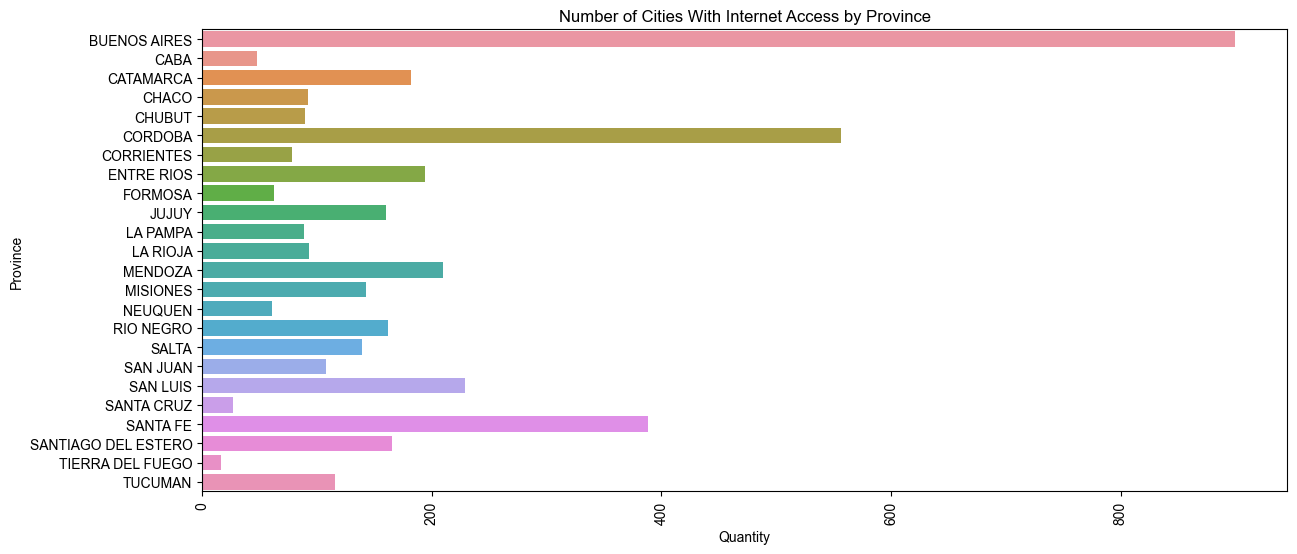

In [17]:
plt.figure(figsize = (14, 6))
sns.countplot(data = df, y = 'Province')
plt.grid(axis = 'y', which = 'minor')
sns.set_style('whitegrid', { 'grid.linestyle': '-.'})
plt.xticks(rotation = 90)
plt.title(('Number of Cities With Internet Access by Province'))
plt.ylabel('Province')
plt.xlabel('Quantity')
plt.show()

As we can see, Buenos Aires is the province with the most cities with Internet access as opposed to Tierra Del Fuego.
These values are 901 and 16, respectively. <br>
This is not surprising at all, since Buenos Aires is a bigger province and the most populated in the country.

### How many cities out of the 4311, have wireless connection

In [18]:
df['Wireless'].value_counts()

Wireless
1    2224
0    2085
Name: count, dtype: int64

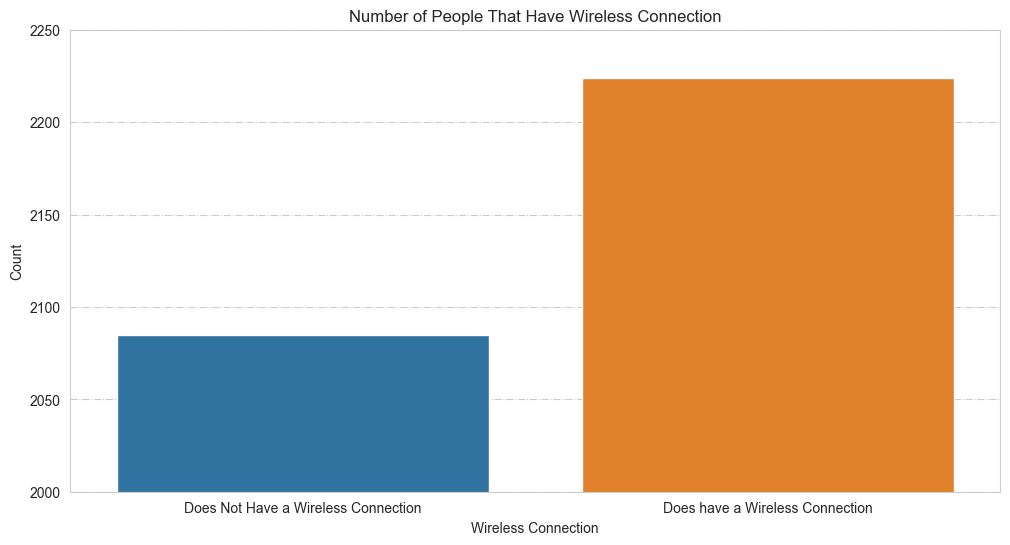

In [19]:
plt.figure(figsize= (12,6))
sns.countplot(data = df, x = 'Wireless')
plt.xticks([0, 1], ['Does Not Have a Wireless Connection', 'Does have a Wireless Connection'])
plt.title('Number of People That Have Wireless Connection')
plt.ylabel('Count')
plt.xlabel('Wireless Connection')

# Resize the Y axis scale so that we can appreciate better the difference
plt.ylim(2000, 2250)
plt.show()

## As we see, there are many cities with no WiFi connection that could represent a valuable untapped revenue source.
___
___


### `Load a second csv file to have a better understanding of the data`

In [20]:
df2 = pd.read_csv('../DataSets/Internet_Penetracion_cada_100_hogares.csv', sep = ',')

In [21]:
df2.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,2022,4,Buenos Aires,"78,94",NaN,NaN,NaN
1,2022,4,Capital Federal,"122,73",NaN,NaN,NaN
2,2022,4,Catamarca,"65,77",NaN,NaN,NaN
3,2022,4,Chaco,"43,62",NaN,NaN,NaN
4,2022,4,Chubut,"85,57",NaN,NaN,NaN


### Get rid of the last three columns that have no values

Check that there are no meaningful values 

In [22]:
df2['Unnamed: 4'].isnull().sum(), df2['Unnamed: 5'].isnull().sum(), df2['Unnamed: 6'].isnull().sum()

(864, 864, 864)

In [23]:
df2.drop(['Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'], axis = 1, inplace = True)

In [24]:
df2

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,4,Buenos Aires,"78,94"
1,2022,4,Capital Federal,"122,73"
2,2022,4,Catamarca,"65,77"
3,2022,4,Chaco,"43,62"
4,2022,4,Chubut,"85,57"
...,...,...,...,...
859,2014,1,Santa Cruz,"28,94"
860,2014,1,Santa Fe,"47,85"
861,2014,1,Santiago Del Estero,"16,31"
862,2014,1,Tierra Del Fuego,"63,97"


### Rename the DataFrame columns for an easier read

In [25]:
df2Columns = {'Año': 'Year', 'Trimestre': 'Quarter', 'Provincia': 'Province', 'Accesos por cada 100 hogares': 'Access per 100 households'}

In [26]:
df2.rename(columns = df2Columns, inplace = True)

In [27]:
df2

,Year,Quarter,Province,Access per 100 households
0,2022,4,Buenos Aires,"78,94"
1,2022,4,Capital Federal,"122,73"
2,2022,4,Catamarca,"65,77"
3,2022,4,Chaco,"43,62"
4,2022,4,Chubut,"85,57"
...,...,...,...,...
859,2014,1,Santa Cruz,"28,94"
860,2014,1,Santa Fe,"47,85"
861,2014,1,Santiago Del Estero,"16,31"
862,2014,1,Tierra Del Fuego,"63,97"


### Get more insight of the DataFrame

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Year                       864 non-null    int64 
 1   Quarter                    864 non-null    int64 
 2   Province                   864 non-null    object
 3   Access per 100 households  864 non-null    object
dtypes: int64(2), object(2)
memory usage: 27.1+ KB


### Check for any duplicate value or null value

In [29]:
df2.isnull().sum()

Year                         0
Quarter                      0
Province                     0
Access per 100 households    0
dtype: int64

In [30]:
df2.duplicated().value_counts()

False    864
Name: count, dtype: int64

### We see that there are no duplicate or null values

### To be able to convert the columns' data type, we first need to replace the '`,`' notation for the '`.`' notation

In [31]:
df2['Access per 100 households'].replace(',', '.', regex = True, inplace = True)

### We reasign data types of the DataFrame

In [32]:
df2['Year'] = df2['Year'].astype('int16') # Discrete qualitative variable

# Quarter is not a numeric variable but rather a cagetorical variable. This is because it
# represents a period in time.
df2['Quarter'] = df2['Quarter'].astype('category') 

df2['Province'] = df2['Province'].astype('category')
df2['Access per 100 households'] = df2['Access per 100 households'].astype('float') # Continuos quantitative variable

### Check the final version of the DataFrame

In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Year                       864 non-null    int16   
 1   Quarter                    864 non-null    category
 2   Province                   864 non-null    category
 3   Access per 100 households  864 non-null    float64 
dtypes: category(2), float64(1), int16(1)
memory usage: 11.2 KB


In [34]:
df2.describe()

,Year,Access per 100 households
count,864.000000,864.000000
mean,2018.000000,49.620301
std,2.583484,23.319150
min,2014.000000,9.350000
25%,2016.000000,32.220000
50%,2018.000000,46.390000
75%,2020.000000,62.442500
max,2022.000000,124.060000


### Some values in '**`Access per 100 households`**' are higher than 100, this could mean that there are households with more than one connection, or these are anomalies. Either way, we get rid of these in order to have a more binary column. (Has Internet access or doesn't)

#### We drop the rows with values higher than 100 and reset the index

In [35]:
df2 = (df2[df2['Access per 100 households'] <= 100])

In [36]:
byYear = df2.groupby('Province')['Access per 100 households'].mean().sort_values(ascending = False)
byYear

Province
Tierra Del Fuego       78.151714
La Pampa               71.277222
Córdoba                66.986111
Buenos Aires           63.979444
Santa Fe               62.836667
Neuquén                62.373889
Río Negro              53.567500
Chubut                 53.114444
Entre Ríos             51.164444
San Luis               44.339722
Tucumán                44.124167
La Rioja               42.564444
Salta                  41.886667
Mendoza                37.265000
Catamarca              36.737500
Jujuy                  35.920000
Corrientes             35.597778
Misiones               35.512222
San Juan               33.618333
Chaco                  33.472778
Santa Cruz             32.937778
Santiago Del Estero    32.591944
Formosa                26.581389
Capital Federal              NaN
Name: Access per 100 households, dtype: float64

### We see that, `Tierra Del Fuego`, despite being one of the least populated provinces is the one with the highest percentaje of Internet access.
#### A few reasons for this could be that Tierra Del Fuego has a lot of tourism and a higher GDP per capita, as well as an economy that is based of hydrocarbons which requires a lot of high-end technology __[(Source)](https://www.minutofueguino.com.ar/provinciales/el-91-de-la-poblacin-tiene-acceso-a-internet-en-tierra-del-fuego-destac-ana-arcos.htm)__

## Proceed to plot the Average Internet Access per 100 Inhabitants by province

#### Drop `Capital Federal` which has no values

In [37]:
byYear.drop(labels = 'Capital Federal', inplace = True)

In [38]:
byYear

Province
Tierra Del Fuego       78.151714
La Pampa               71.277222
Córdoba                66.986111
Buenos Aires           63.979444
Santa Fe               62.836667
Neuquén                62.373889
Río Negro              53.567500
Chubut                 53.114444
Entre Ríos             51.164444
San Luis               44.339722
Tucumán                44.124167
La Rioja               42.564444
Salta                  41.886667
Mendoza                37.265000
Catamarca              36.737500
Jujuy                  35.920000
Corrientes             35.597778
Misiones               35.512222
San Juan               33.618333
Chaco                  33.472778
Santa Cruz             32.937778
Santiago Del Estero    32.591944
Formosa                26.581389
Name: Access per 100 households, dtype: float64

In [39]:
df2 = df2.sort_values(by = 'Quarter', ascending = True)

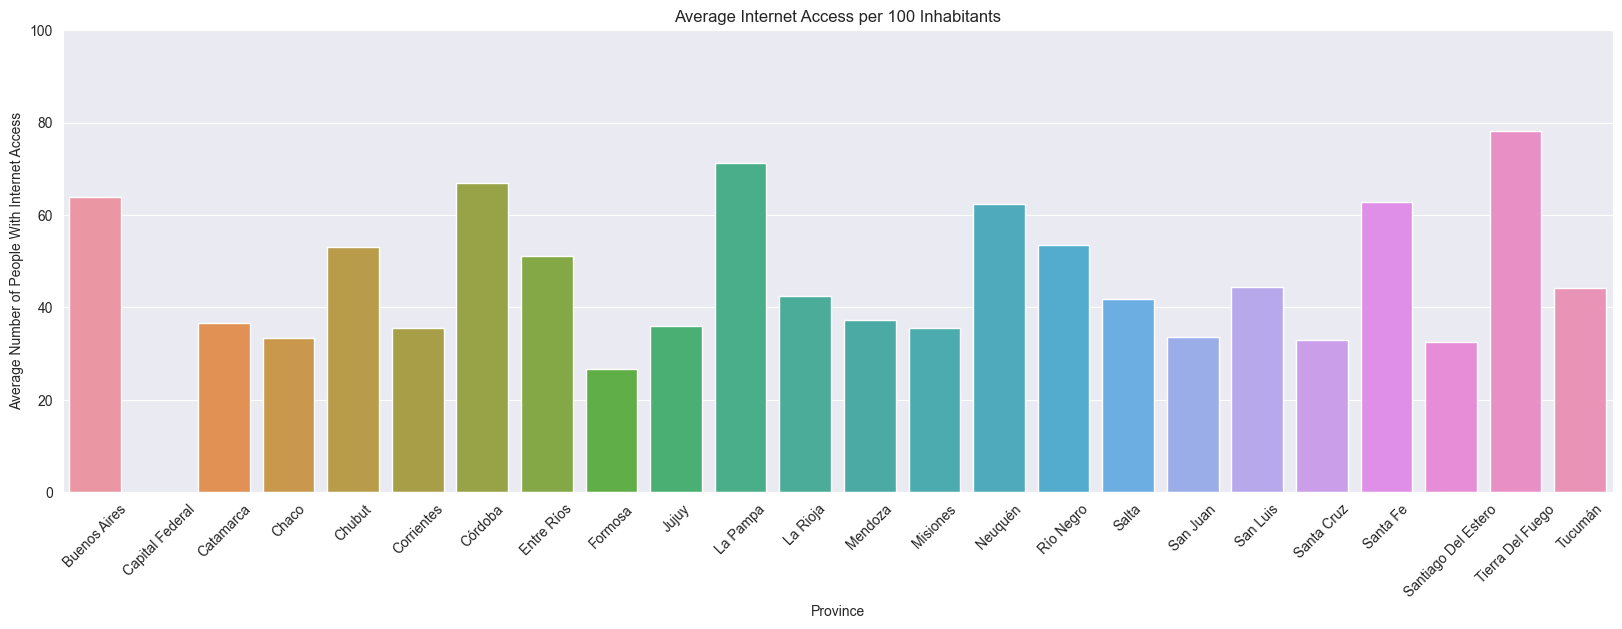

In [40]:
plt.figure(figsize = (20, 6))
sns.set_style('darkgrid')
sns.barplot(x = byYear.index, y = byYear.values)

plt.xticks(rotation = 45)
plt.title('Average Internet Access per 100 Inhabitants')
plt.xlabel('Province')
plt.ylabel('Average Number of People With Internet Access')
plt.ylim((0, 100))
plt.show()

### The graph indicates that only half of the 23 provinces have between a 60% to 80% of their population with Internet access

### We change the data type of the `Quarter` column so that we can use it as _`hue`_

In [41]:
df2['Quarter'] = df2['Quarter'].astype('string')

We previously changed quarter because even though we have it as a number, the nature of the variable does not respond to a quantitative variable but a qualitative variable. This could also be interpreted as a categorical variable. <br>
So now we change it as a string in order to avoid a `AttributeError`

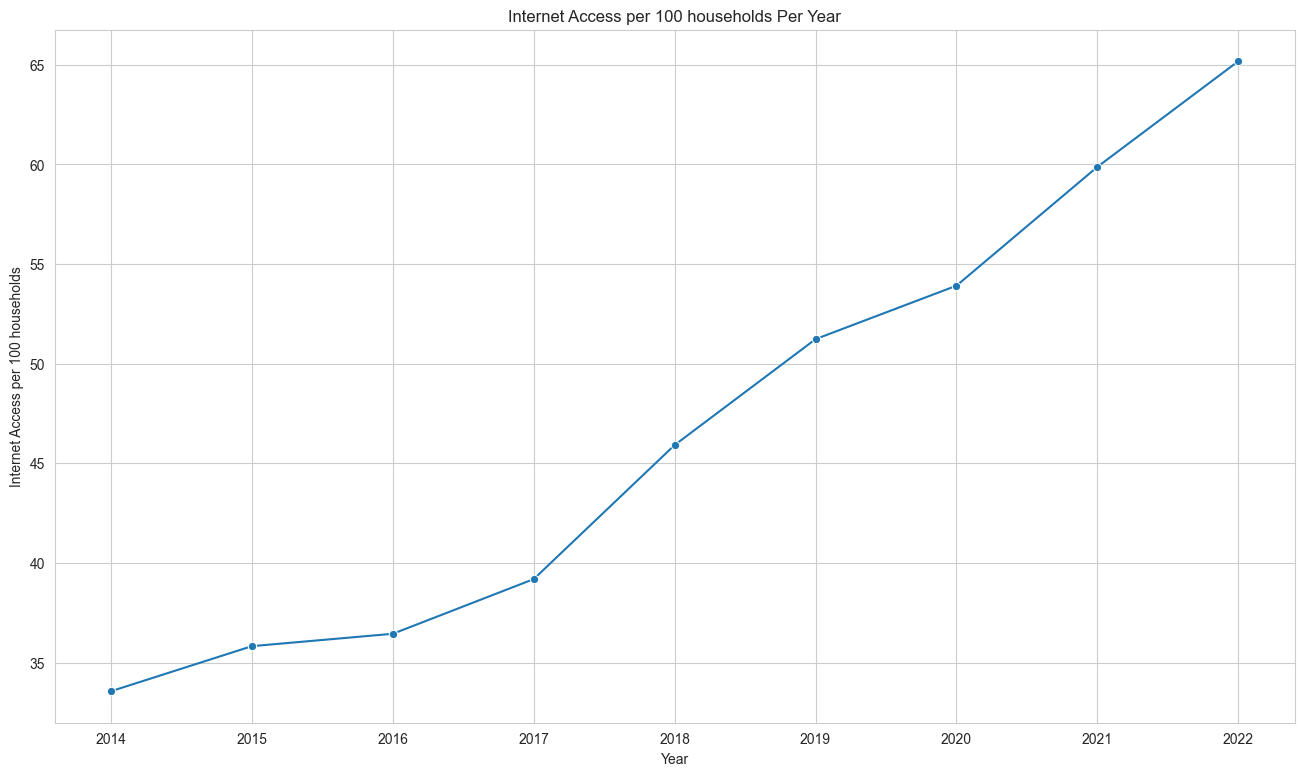

In [42]:
sns.set_style('whitegrid')
plt.figure(figsize = (16, 9))
sns.lineplot(data = df2, x = 'Year', y = 'Access per 100 households', marker = 'o', errorbar = None,alpha = 1)
plt.title('Internet Access per 100 households Per Year')
plt.xlabel('Year')
plt.ylabel('Internet Access per 100 households')
plt.grid(which='minor')
plt.show()

The graph shows that the number of people who have access to internet has accelerated rapidly in the past five years. It went from around 30 people out of 100, to more than double in just 8 years <br>
An interesting thought, is that in 2020 and in 2021 the amount of connections scaled quickly, this could be associated to the pandemic which forced people to work from home and spend a lot of time on the Internet <br>
[More than 500 thousand people hired an Internet provider](https://www.clarin.com/economia/teletrabajo-pandemia-medio-millon-hogares-contrato-internet_0_nn6f0GHvOT.html)

## If we want a more detailed version, we could visualize it by each quarter of the year

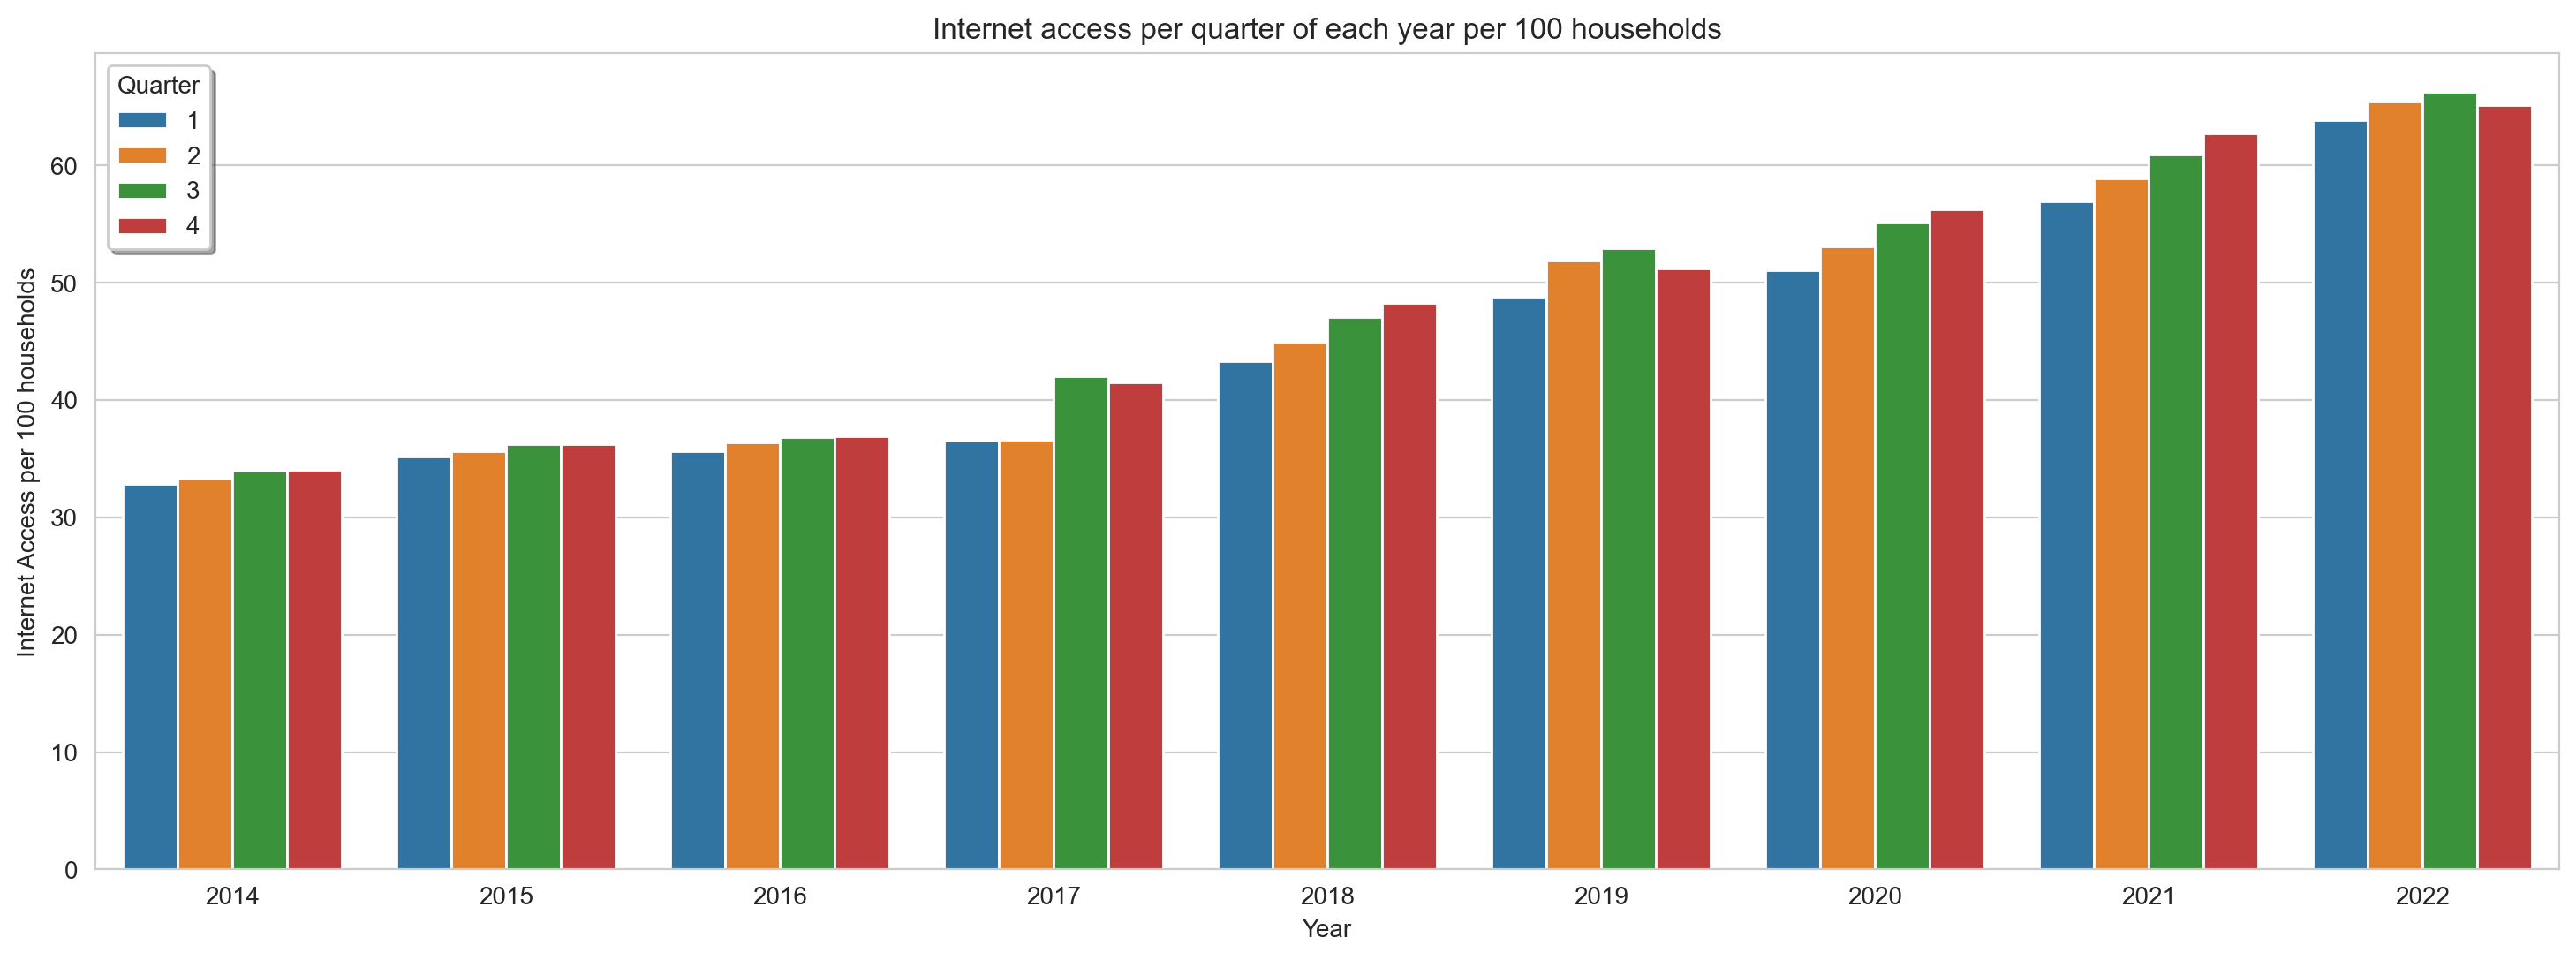

In [43]:
plt.figure(figsize = (18, 6), dpi = 200.0)
sns.barplot(df2, x =  'Year', y = 'Access per 100 households', hue = 'Quarter', errorbar = None)
plt.legend(title = 'Quarter', shadow = True, loc = 'best')
plt.ylabel('Internet Access per 100 households')
plt.xlabel('Year')
plt.title('Internet access per quarter of each year per 100 households')
plt.show()

### As we can see, there is a trend of increasing Internet access, which has deepened in recent years
___
___

## **``Final Key Takeaways``**

 - ### Buenos Aires has the highest number of cities with Internet access
 - ### Tierra del Fuego has the highest rate of Internet connection compared to the rest of the country
 - ### Almost half the cities in Argentina do not have wireless connection
 - ### The country has seen a steady growth in Internet connection in recent years 